# Clustering Analysis - Con y Sin PCA

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

#data_path = Path("src/data_sample/wholesale_customers_final.csv")
#df = pd.read_csv(data_path)

df = pd.read_csv(r"C:\Users\patri\REPO_PRUEBA\ML_Customer_Segmentation\src\data_sample\wholesale_customers_final.csv")

In [2]:
df = pd.get_dummies(df, columns=["Channel"], drop_first=True)
if 'Region' in df.columns:
    df = df.drop("Region", axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fresh             440 non-null    float64
 1   Milk              440 non-null    float64
 2   Grocery           440 non-null    float64
 3   Frozen            440 non-null    float64
 4   Detergents_Paper  440 non-null    float64
 5   Delicassen        440 non-null    float64
 6   Channel_2         440 non-null    bool   
dtypes: bool(1), float64(6)
memory usage: 21.2 KB


## Clustering sin PCA

In [4]:
X = df.copy()

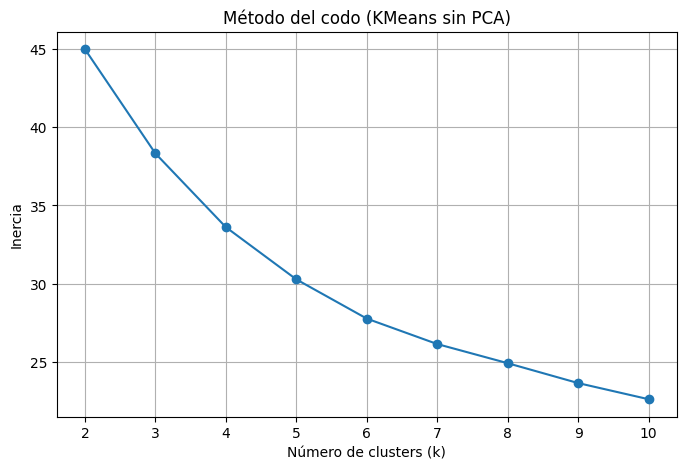

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
k_range = range(2, 11)  

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)  
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Método del codo (KMeans sin PCA)")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()


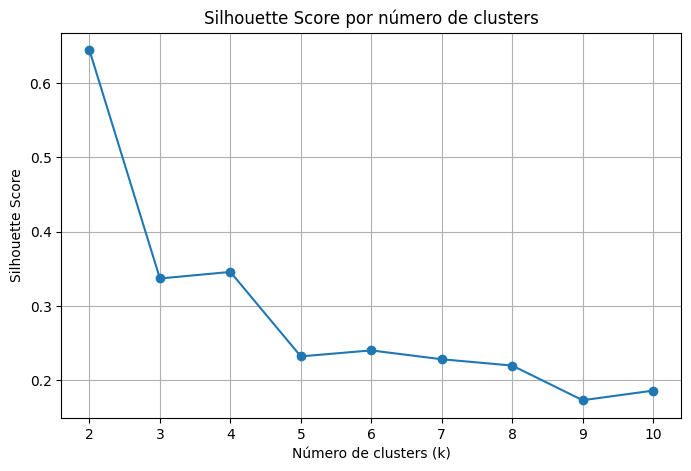

In [9]:
from sklearn.metrics import silhouette_score

silhouettes = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouettes.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouettes, marker='o')
plt.title("Silhouette Score por número de clusters")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [6]:
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(X)
df["Cluster_2"] = labels_2

score_2 = silhouette_score(X, labels_2)
print(f"Silhouette Score (k=2): {score_2:.3f}")

Silhouette Score (k=2): 0.644


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fresh             440 non-null    float64
 1   Milk              440 non-null    float64
 2   Grocery           440 non-null    float64
 3   Frozen            440 non-null    float64
 4   Detergents_Paper  440 non-null    float64
 5   Delicassen        440 non-null    float64
 6   Channel_2         440 non-null    bool   
dtypes: bool(1), float64(6)
memory usage: 21.2 KB


In [8]:
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(X)
df["Cluster_3"] = labels_3

score_3 = silhouette_score(X, labels_3)
print(f"Silhouette Score (k=3): {score_3:.3f}")

Silhouette Score (k=3): 0.337


In [9]:
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(X)
df["Cluster_4"] = labels_4

score_4 = silhouette_score(X, labels_4)
print(f"Silhouette Score (k=4): {score_4:.3f}")

Silhouette Score (k=4): 0.346


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fresh             440 non-null    float64
 1   Milk              440 non-null    float64
 2   Grocery           440 non-null    float64
 3   Frozen            440 non-null    float64
 4   Detergents_Paper  440 non-null    float64
 5   Delicassen        440 non-null    float64
 6   Channel_2         440 non-null    bool   
dtypes: bool(1), float64(6)
memory usage: 21.2 KB


In [11]:
df.groupby("Cluster_2").mean(numeric_only=True)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_2,Cluster_3,Cluster_4
Cluster_2,,,,,,,,,
0,0.682126,0.696264,0.808018,0.462791,0.780437,0.588881,1.0,1.000000,0.000000
1,0.734122,0.510625,0.651425,0.549290,0.492744,0.550257,0.0,1.026846,1.895973


# PCA

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fresh             440 non-null    float64
 1   Milk              440 non-null    float64
 2   Grocery           440 non-null    float64
 3   Frozen            440 non-null    float64
 4   Detergents_Paper  440 non-null    float64
 5   Delicassen        440 non-null    float64
 6   Channel_2         440 non-null    bool   
dtypes: bool(1), float64(6)
memory usage: 21.2 KB


In [13]:
pca = PCA()
x_pca = pca.fit_transform(X)

Varianza explicada por cada componente: [0.72267852 0.10498056 0.06662707 0.04075552 0.03583427 0.02130447
 0.00781958]
Varianza acumulada: [0.72267852 0.82765909 0.89428616 0.93504168 0.97087595 0.99218042
 1.        ]


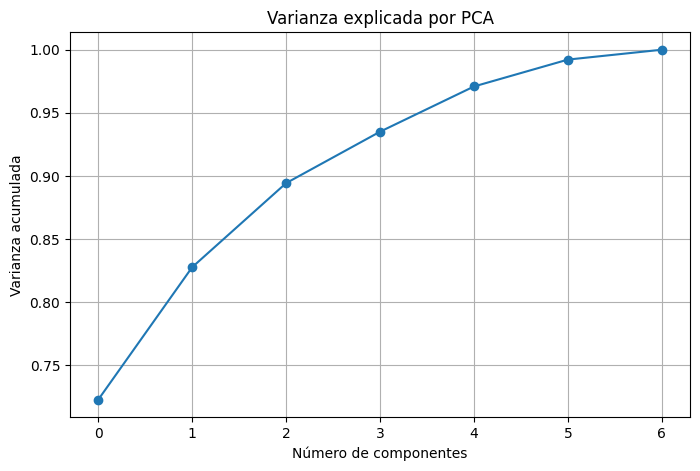

In [ ]:

explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", explained_variance)
print("Varianza acumulada:", np.cumsum(explained_variance))

plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Varianza explicada por PCA')
plt.grid(True)
plt.show()

* Con las 2 primeras componentes → 72% de la info

* Con 3 componentes → 83% 

* Con 4 componentes → 93% → casi toda la info

Probamos dos cosas: 

- Usar las variables orginales tras la ranformacion logaritima 
- Probar con PCA 

## Clustering con PCA

In [ ]:

pca_final = PCA(n_components=4)
X_pca = pca_final.fit_transform(X)


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_pca = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca)

df["Cluster_PCA"] = labels_pca


silhouette_pca = silhouette_score(X_pca, labels_pca)
print(f"Silhouette Score (PCA + KMeans, k=2): {silhouette_pca:.3f}")

Silhouette Score (PCA + KMeans, k=2): 0.690


In [ ]:

cols_originales = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'Channel_2']

df[cols_originales + ['Cluster_PCA']].groupby("Cluster_PCA").mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_2
Cluster_PCA,,,,,,,
0,0.682126,0.696264,0.808018,0.462791,0.780437,0.588881,1.0
1,0.734122,0.510625,0.651425,0.549290,0.492744,0.550257,0.0


In [16]:
df.groupby("Cluster_PCA").mean(numeric_only=True)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_2,Cluster_2,Cluster_3,Cluster_4
Cluster_PCA,,,,,,,,,,
0,0.682126,0.696264,0.808018,0.462791,0.780437,0.588881,1.0,0.0,1.000000,0.000000
1,0.734122,0.510625,0.651425,0.549290,0.492744,0.550257,0.0,1.0,1.026846,1.895973


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


pca_fina = PCA(n_components=2)
X_pca_2d = pca_2.fit_transform(X)


kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca_2d)


silhouette_pca = silhouette_score(X_pca_2d, labels_pca)
print(f"Silhouette Score (PCA 2D): {silhouette_pca:.3f}")


df['Cluster_PCA'] = labels_pca

Silhouette Score (PCA 2D): 0.540


In [ ]:

kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca_2d)

silhouette_pca = silhouette_score(df_pca, clusters_pca)
print(f"Silhouette Score (Datos reducidos con PCA): {silhouette_pca:.3f}")

Silhouette Score (Datos reducidos con PCA): 0.691


In [ ]:

from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

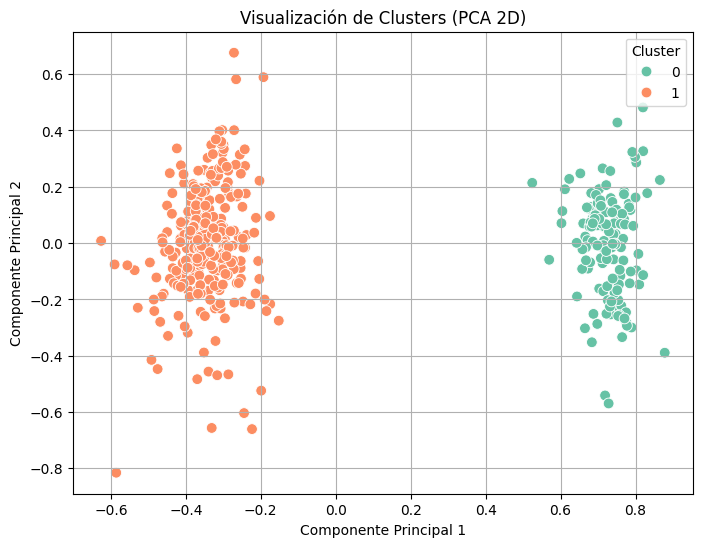

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca_2d[:, 0],
    y=X_pca_2d[:, 1],
    hue=df["Cluster_PCA"],
    palette='Set2',
    s=60
)
plt.title("Visualización de Clusters (PCA 2D)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


## Comparación

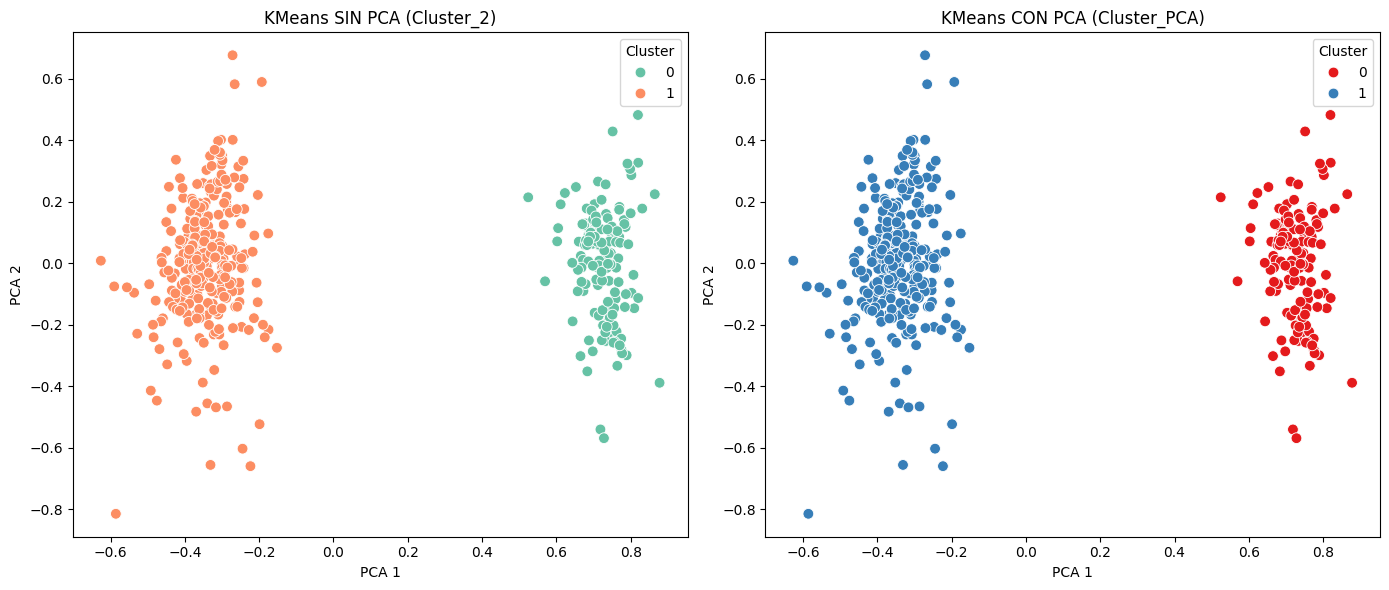

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.scatterplot(
    x=X_pca_2d[:, 0], y=X_pca_2d[:, 1],
    hue=df["Cluster_2"],
    palette='Set2', s=60, ax=axes[0]
)
axes[0].set_title("KMeans SIN PCA (Cluster_2)")
axes[0].set_xlabel("PCA 1")
axes[0].set_ylabel("PCA 2")
axes[0].legend(title="Cluster")


sns.scatterplot(
    x=X_pca_2d[:, 0], y=X_pca_2d[:, 1],
    hue=df["Cluster_PCA"],
    palette='Set1', s=60, ax=axes[1]
)
axes[1].set_title("KMeans CON PCA (Cluster_PCA)")
axes[1].set_xlabel("PCA 1")
axes[1].set_ylabel("PCA 2")
axes[1].legend(title="Cluster")

plt.tight_layout()
plt.show()


In [41]:
print("Distribución por cluster (KMeans original):")
print(df['Cluster_KMeans'].value_counts().sort_index())

print("\nDistribución por cluster (KMeans con PCA):")
print(df['Cluster_PCA'].value_counts().sort_index())

Distribución por cluster (KMeans original):
Cluster_KMeans
0    145
1    142
2    153
Name: count, dtype: int64

Distribución por cluster (KMeans con PCA):
Cluster_PCA
0    147
1    142
2    151
Name: count, dtype: int64


In [42]:
pd.crosstab(df['Cluster_KMeans'], df['Cluster_PCA'], 
            rownames=["KMeans original"], colnames=["KMeans PCA"])

KMeans PCA,0,1,2
KMeans original,,,
0,139,0,6
1,0,142,0
2,8,0,145


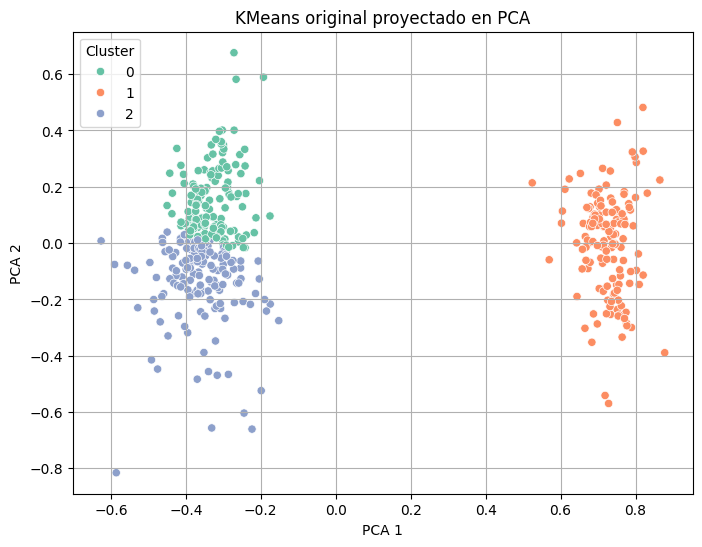

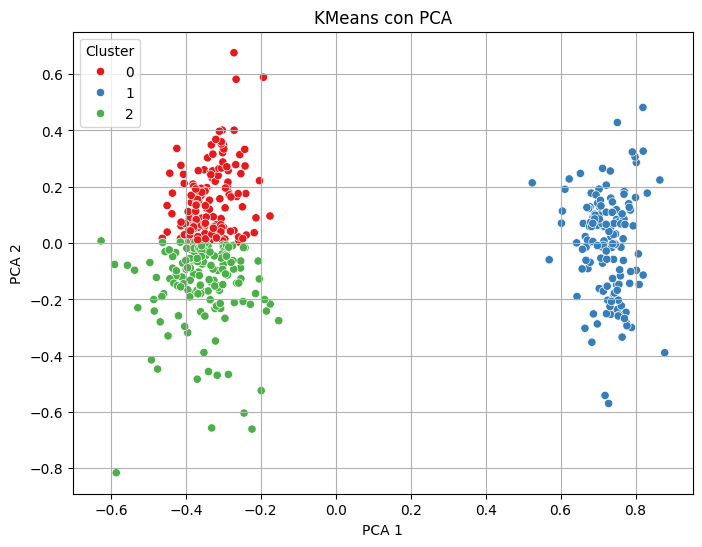

In [ ]:

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=df['Cluster_KMeans'], palette='Set2')
plt.title("KMeans original proyectado en PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=df['Cluster_PCA'], palette='Set1')
plt.title("KMeans con PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()

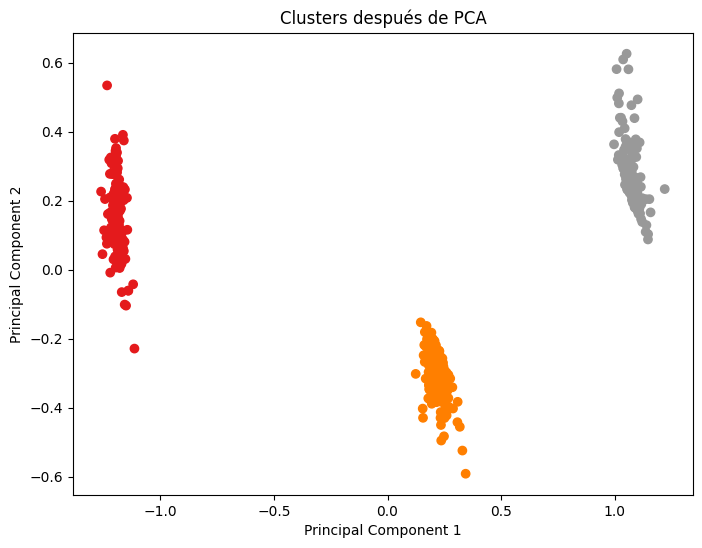

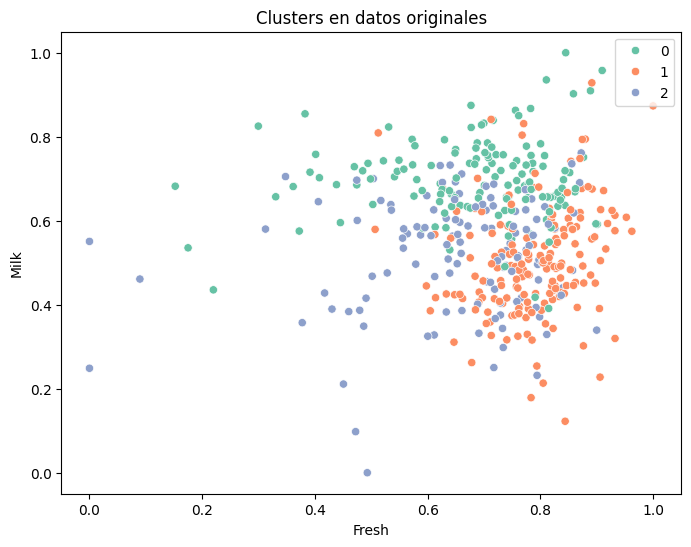

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters_pca, cmap='Set1')
plt.title('Clusters después de PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df.iloc[:, 0], 
    y=df.iloc[:, 1], 
    hue=df['Cluster_Original'], 
    palette='Set2'
)
plt.title('Clusters en datos originales')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.legend()
plt.show()

Nos quedamos con el PCA, pero vamos a probar con dos algoritmos mas

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_pca_2d)

df["Cluster_DBSCAN"] = labels_dbscan


n_noise = np.sum(labels_dbscan == -1)
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)


if n_clusters_dbscan > 1:
    score_dbscan = silhouette_score(X_pca_2d[labels_dbscan != -1], labels_dbscan[labels_dbscan != -1])
    print(f"Silhouette Score (DBSCAN): {score_dbscan:.3f} (Outliers: {n_noise})")
else:
    score_dbscan = -1
    print("DBSCAN no encontró clusters válidos")


Silhouette Score (DBSCAN): 0.789 (Outliers: 1)


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


dbscan = DBSCAN(eps=0.3, min_samples=5)  
labels_dbscan = dbscan.fit_predict(X_pca_2d)


n_noise = np.sum(labels_dbscan == -1)

if len(set(labels_dbscan)) > 1 and -1 in labels_dbscan:
    score_dbscan = silhouette_score(X_pca_2d[labels_dbscan != -1], labels_dbscan[labels_dbscan != -1])
    print(f"Silhouette Score (DBSCAN, sin outliers): {score_dbscan:.3f}")
else:
    score_dbscan = -1
    print("DBSCAN no generó clusters válidos")

df["Cluster_DBSCAN"] = labels_dbscan

Silhouette Score (DBSCAN, sin outliers): 0.789


DBSCAN no ha encontrado más de un cluster.


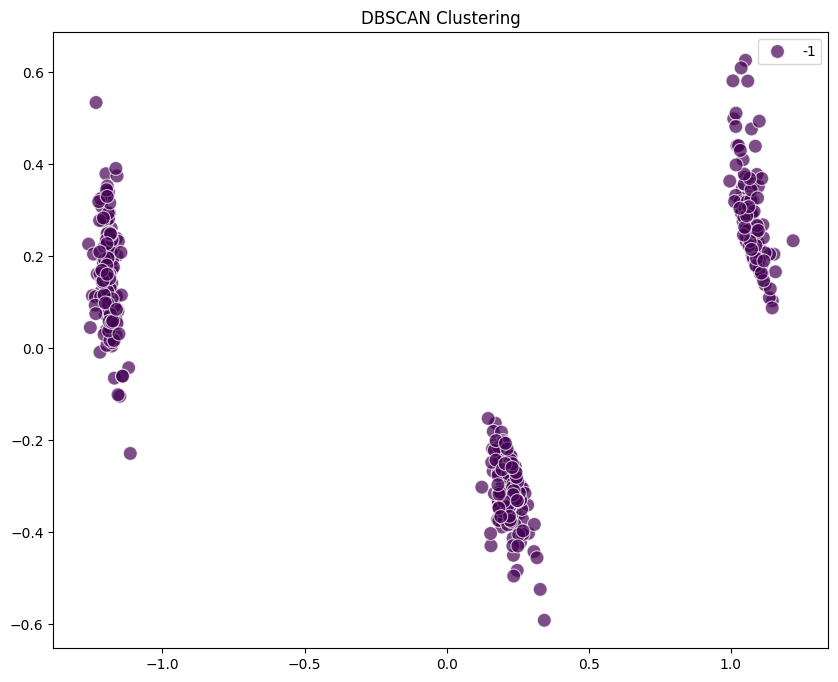

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


dbscan = DBSCAN(eps=0.02, min_samples=10)


dbscan_labels = dbscan.fit_predict(df_pca)


if len(np.unique(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(df_pca, dbscan_labels)
    print(f"Silhouette Score (DBSCAN): {silhouette_dbscan:.3f}")
else:
    print("DBSCAN no ha encontrado más de un cluster.")

plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=dbscan_labels, palette="viridis", s=100, alpha=0.7)
plt.title("DBSCAN Clustering")
plt.show()

## Aglomerative clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


agglo = AgglomerativeClustering(n_clusters=2)
labels_agglo = agglo.fit_predict(X_pca_2d)


df["Cluster_Agglo"] = labels_agglo


score_agglo = silhouette_score(X_pca_2d, labels_agglo)
print(f"Silhouette Score (Agglomerative, k=2): {score_agglo:.3f}")

Silhouette Score (Agglomerative, k=2): 0.787


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


agglo = AgglomerativeClustering(n_clusters=3)
labels_agglo = agglo.fit_predict(X_pca_2d)

silhouette_agglo = silhouette_score(X_pca_2d, labels_agglo)
print(f"Silhouette Score (Agglomerative): {silhouette_agglo:.3f}")


df["Cluster_Agglo"] = labels_agglo

Silhouette Score (Agglomerative): 0.545


Silhouette Score (Agglomerative Clustering): 0.690863938208196


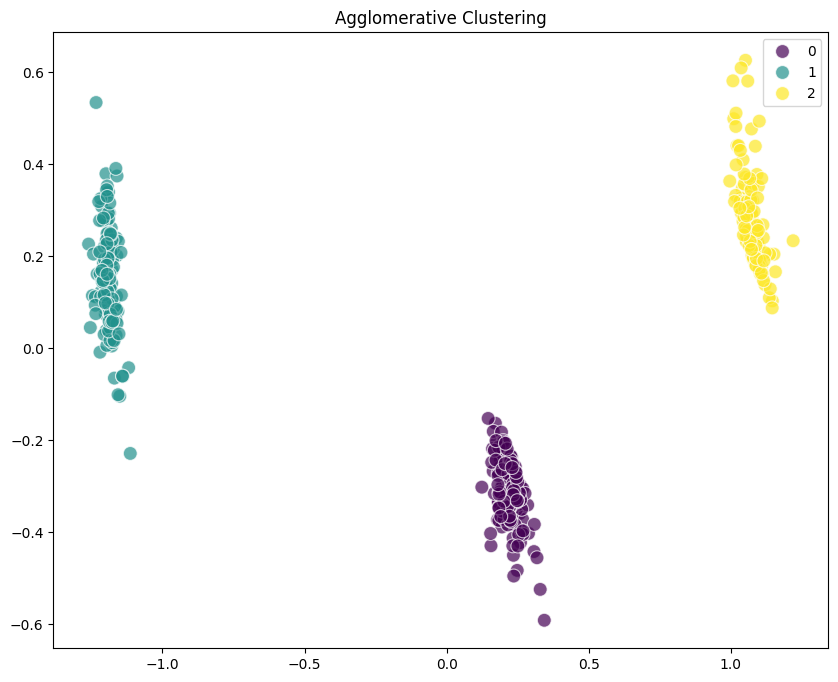

In [ ]:
from sklearn.cluster import AgglomerativeClustering


agg_clust = AgglomerativeClustering(n_clusters=n_clusters)  # Número de clusters, ajustable


agg_clust_labels = agg_clust.fit_predict(df_pca)

silhouette_agg_clust = silhouette_score(df_pca, agg_clust_labels)
print("Silhouette Score (Agglomerative Clustering):", silhouette_agg_clust)


plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=agg_clust_labels, palette="viridis", s=100, alpha=0.7)
plt.title("Agglomerative Clustering")
plt.show()


## Comparamos los tres modelos

In [ ]:

print(f"Silhouette Score (k-means SIN PCA): {silhouette_p:.3f}")
print(f"Silhouette Score (k-means con PCA): {sco:.3f}")
print("Silhouette Score (DBSCAN):", score_dbscan)
print("Silhouette Score (Agglomerative Clustering):", score_agglo)

In [ ]:
 
print(f"Silhouette Score (k-means): {silhouette_pca:.3f}")
print("Silhouette Score (DBSCAN):", silhouette_dbscan)
print("Silhouette Score (Agglomerative Clustering):", silhouette_agg_clust)


Silhouette Score (k-means): 0.690


NameError: name 'silhouette_dbscan' is not defined

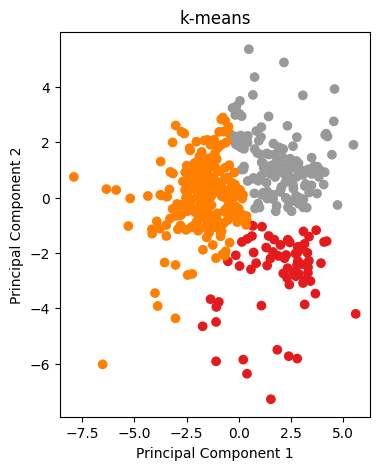

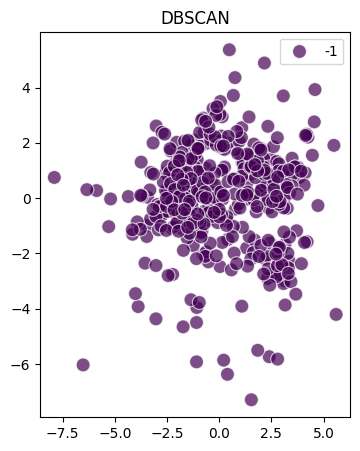

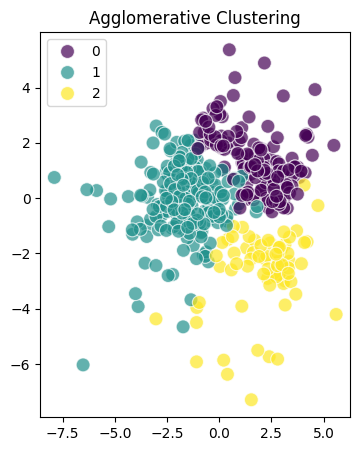

In [ ]:

plt.figure(figsize=(4, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters_pca, cmap='Set1')
plt.title('k-means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



plt.figure(figsize=(4, 5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=dbscan_labels, palette="viridis", s=100, alpha=0.7)
plt.title("DBSCAN")
plt.show()

plt.figure(figsize=(4, 5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=agg_clust_labels, palette="viridis", s=100, alpha=0.7)
plt.title("Agglomerative Clustering")
plt.show()


* K-Means tiene el mejor Silhouette Score y en el grafico los grupos estan bien definidos

* DBSCAN fatal, ha creado demasiados grupos y están mal definidos. Quizás por los outliers

* Agglomerative Clustering no tiene mal Silhouette Score, pero menor que k-means, e identofoca 4 grupos 


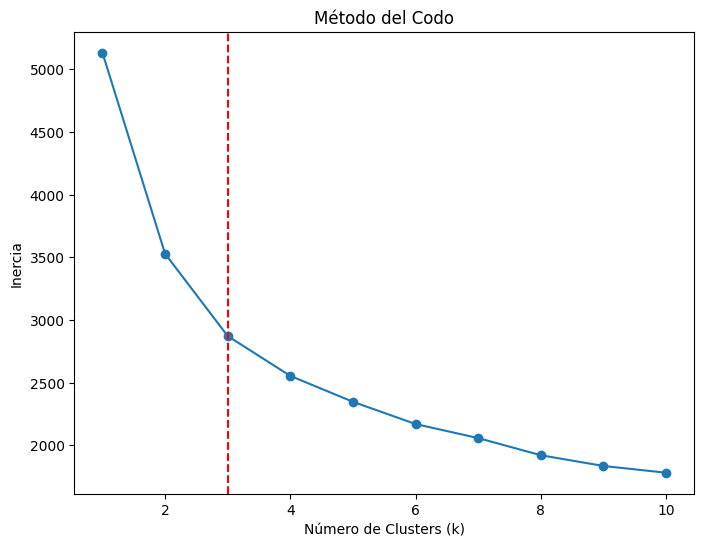

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


k_range = range(1, 11) 
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)  
    inertia.append(kmeans.inertia_) 


plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.axvline(x=n_clusters, color='red', linestyle='--', label=f'k óptimo = {n_clusters}')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.show()


In [ ]:

df_updated['Cluster'] = clusters_pca  


cluster_means = df_updated.groupby('Cluster').mean()


print(cluster_means)


            Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
Cluster                                                                         
0        6.739585  8.589718  9.164429  5.799511          8.192726    5.575592   
1        9.028648  7.463828  7.692074  7.610076          5.533174    6.510385   
2        9.212022  8.995238  9.346301  7.524184          8.216179    7.476414   

         Channel_1  Channel_2  Cluster_Original  
Cluster                                          
0         0.367647   0.632353               0.0  
1         0.987124   0.012876               1.0  
2         0.309353   0.690647               2.0  


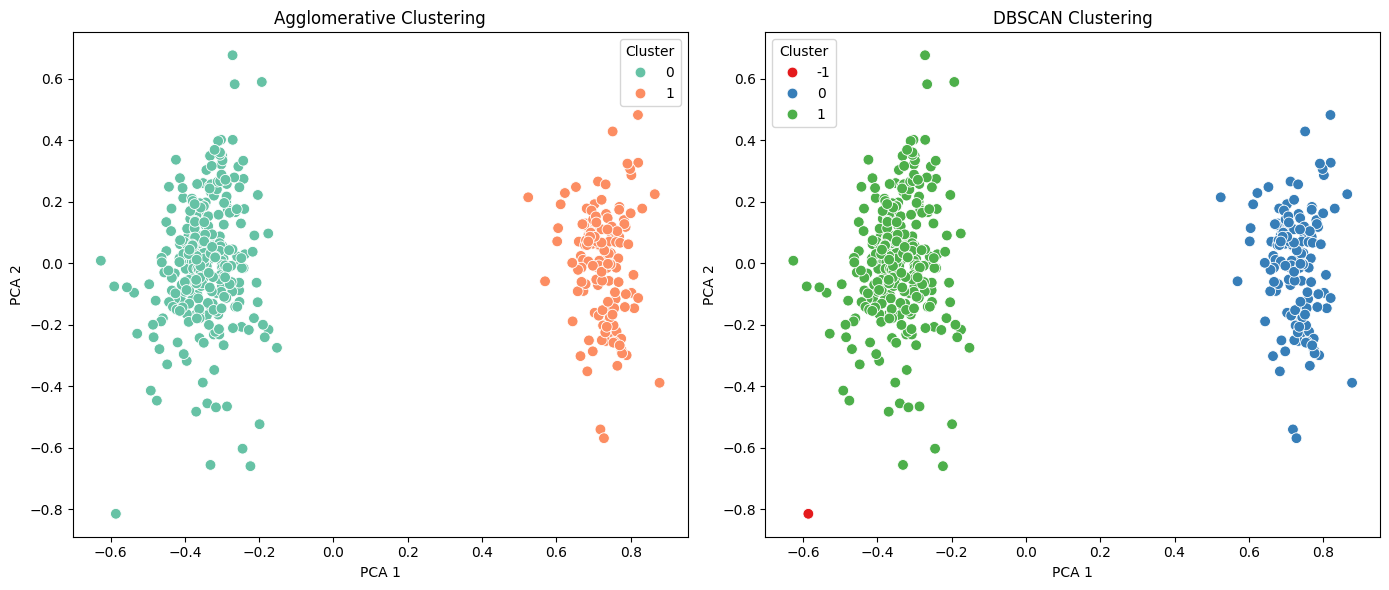

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.scatterplot(
    x=X_pca_2d[:, 0], y=X_pca_2d[:, 1],
    hue=df["Cluster_Agglo"], palette='Set2', s=60, ax=axes[0]
)
axes[0].set_title("Agglomerative Clustering")
axes[0].set_xlabel("PCA 1")
axes[0].set_ylabel("PCA 2")
axes[0].legend(title="Cluster")


sns.scatterplot(
    x=X_pca_2d[:, 0], y=X_pca_2d[:, 1],
    hue=df["Cluster_DBSCAN"], palette='Set1', s=60, ax=axes[1]
)
axes[1].set_title("DBSCAN Clustering")
axes[1].set_xlabel("PCA 1")
axes[1].set_ylabel("PCA 2")
axes[1].legend(title="Cluster")

plt.tight_layout()
plt.show()
